In [1]:
from scipy.integrate import odeint  
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Figure 7
def sdot_toggle(s,t,params):
    # variables and parameters
    P1, P2 = s
    kp1, kp2, kdp1, kdp2, K1, K2, n1, n2 = params
    
    # rate equations
    rate_P1_production = kp1 * ((K2**n2)/(P2**n2 + K2**n2))
    rate_P2_production = kp2 * ((K1**n1)/(P1**n1 + K1**n1))
    rate_P1_loss = -kdp1*P1
    rate_P2_loss = -kdp2*P2
    dP1 = rate_P1_production + rate_P1_loss
    dP2 = rate_P2_production + rate_P2_loss
    dsdt = [dP1, dP2]
    return dsdt

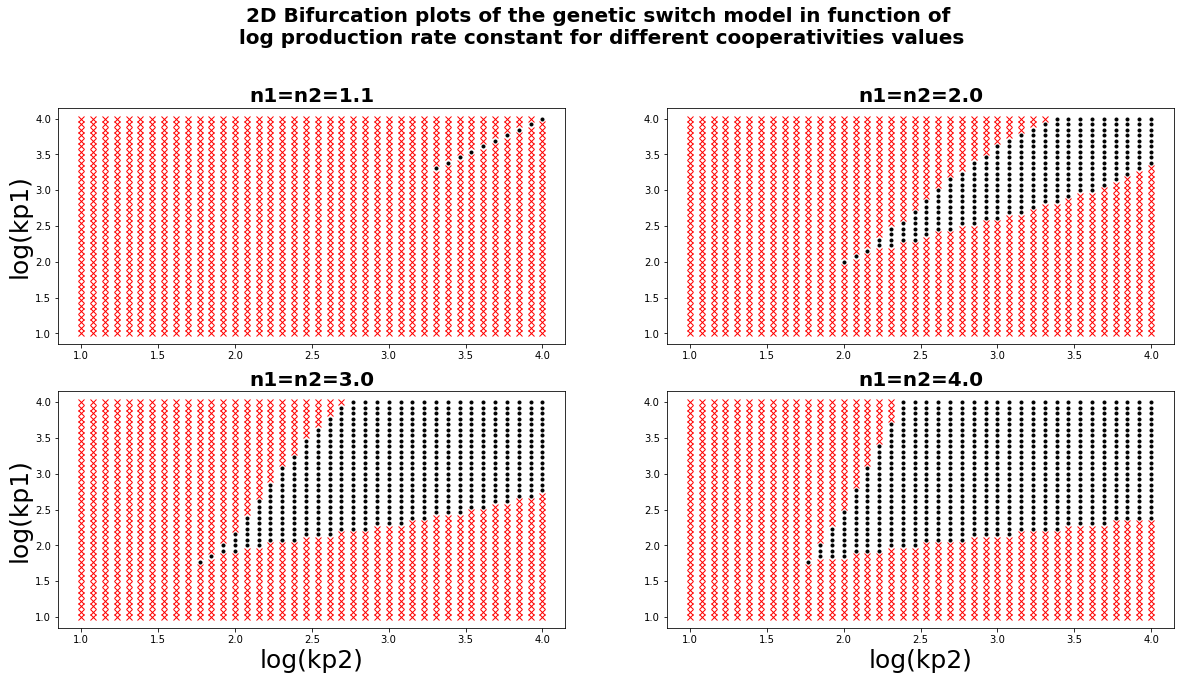

In [3]:
# define default parameter values 
# (rate constants use time units in minutes)

# starting with cooperativity of 1.1
# kp1 = 120.0
# kp2 = 120.0
K1 = 3000.0
K2 = 3000.0
n1 = 1.1
n2 = 1.1
kdp1 = 1.0/60.0
kdp2 = 1.0/60.0

# define list of observation points 't_obs'
t_start = 0
t_end = 10000
n_obs = 1000
t_obs = np.linspace(t_start, t_end, n_obs)

# plot shows results across a range of kp1 and kp2 values
# and uses log scales. 
# therefore we create sets of log kp1 and log kp2 values
# so that points plotted will have even spacing on log scale

num_vals = 40
# increase num_vals e.g. to 40 when you have the code working

log_kp1_vals = np.linspace(1,4,num_vals)
log_kp2_vals = np.linspace(1,4,num_vals)
## now log_kp1_vals, log_kp2_vals vals run from 10**1 to 10**4 
# i.e. 10 to 10000

# set a threshold for comparing p1 levels and p2 levels
# if difference is less than this threshold we say 
# the two levels are similar
threshold = 1.0

# make figure that the results will be plotted into
fig = plt.figure(figsize=(20,20))
fig.suptitle('2D Bifurcation plots of the genetic switch model in function of\n log production rate constant for different cooperativities values', 
             fontsize=20, fontweight='bold', y=0.95)
ax1 = fig.add_subplot(4,2,1)
ax2 = fig.add_subplot(4,2,2)
ax3 = fig.add_subplot(4,2,3)
ax4 = fig.add_subplot(4,2,4)

# loop over the set of kp1 and kp2 values:

for log_kp1 in log_kp1_vals:
    for log_kp2 in log_kp2_vals:
        
        # calculate the rates from the log values
        kp1 = 10**log_kp1
        kp2 = 10**log_kp2
        
        # run simulation starting in
        # P1 state low
        # P2 state high
        
        p1=0
        p2=10000
        s0=(p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]
        
        # if p1_final > p2_final + threshold, then result_1 = "p1_high_p2_low"
        # else if p1_final < p2_final - threshold, then result_1 = "p1_low_p2_high"
        # else set result_1 = "p1_p2_similar" 
        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
        
        # run simulation starting in
        # P1 state high
        # P2 state low
        
        p1=10000
        p2=0
        s0=(p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        # if p1_final > p2_final + threshold, then result_2 = "p1_high_p2_low"
        # else if p1_final < p2_final - threshold, then result_2 = "p1_low_p2_high"
        # else set result_2 = "p1_p2_similar" 
        
        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        # if result_1 and result_2 are the same, then both initial states
        # ended in the same final states - no toggle behaviour observed
        # ---> plot a red cross on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
        #
        # if result_1 and result_2 are different then the different initial states
        # end in different final states - toggle behaviour has been observed
        # ---> plot a black point on the bifurcation diagram ax1 at coords (log_kp1, log_kp2)
    
        if result_1 == result_2:
            ax1.plot(log_kp1, log_kp2,'rx')
        if result_1 != result_2:
            ax1.plot(log_kp1, log_kp2,'k.')

#cooperativity of 2
n1=2.0
n2=2.0
for log_kp1 in log_kp1_vals:
    for log_kp2 in log_kp2_vals:

        # calculate the rates from the log values
        kp1 = 10**log_kp1
        kp2 = 10**log_kp2

        # run simulation starting in
        # P1 state low
        # P2 state high

        p1=0
        p2=10000
        s0=(p1,p2)

        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'
            
        # P1 state high
        # P2 state low

        p1=10000
        p2=0
        s0=(p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        if result_1 == result_2:
            ax2.plot(log_kp1, log_kp2,'rx')
        if result_1 != result_2:
            ax2.plot(log_kp1, log_kp2,'k.')

#cooperativity of 3
n1=3.0
n2=3.0

for log_kp1 in log_kp1_vals:
    for log_kp2 in log_kp2_vals:

        # calculate the rates from the log values
        kp1 = 10**log_kp1
        kp2 = 10**log_kp2

        # run simulation starting in
        # P1 state low
        # P2 state high

        p1=0
        p2=10000
        s0=(p1,p2)

        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'

        # P1 state high
        # P2 state low
        
        p1=10000
        p2=0
        s0=(p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        if result_1 == result_2:
            ax3.plot(log_kp1, log_kp2,'rx')
        if result_1 != result_2:
            ax3.plot(log_kp1, log_kp2,'k.')

#cooperativity of 4
n1=4.0
n2=4.0

for log_kp1 in log_kp1_vals:
    for log_kp2 in log_kp2_vals:

        # calculate the rates from the log values
        kp1 = 10**log_kp1
        kp2 = 10**log_kp2

        # run simulation starting in
        # P1 state low
        # P2 state high

        p1=0
        p2=10000
        s0=(p1,p2)

        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_1 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_1 = "p1_low_p2_high"
        else:
            result_1 = 'p1_p2_similar'

        # P1 state high
        # P2 state low
        
        p1=10000
        p2=0
        s0=(p1,p2)
        params=(kp1, kp2, kdp1, kdp2, K1, K2, n1, n2)
        s_obs=odeint(sdot_toggle,s0,t_obs,args=(params,))
        p1_obs=s_obs[:,0]
        p2_obs=s_obs[:,1]

        if p1_obs[-1] > (p2_obs[-1]+threshold):
            result_2 = "p1_high_p2_low"
        elif p1_obs[-1] < (p2_obs[-1]-threshold):
            result_2 = "p1_low_p2_high"
        else:
            result_2 = 'p1_p2_similar'

        if result_1 == result_2:
            ax4.plot(log_kp1, log_kp2,'rx')
        if result_1 != result_2:
            ax4.plot(log_kp1, log_kp2,'k.')

# set title and labels for plots
ax1.set_title('n1=n2=1.1', fontsize=20, fontweight='bold')
ax2.set_title('n1=n2=2.0', fontsize=20, fontweight='bold')
ax3.set_title('n1=n2=3.0', fontsize=20, fontweight='bold')
ax4.set_title('n1=n2=4.0', fontsize=20, fontweight='bold')

ax1.set_ylabel('log(kp1)')
ax3.set_xlabel('log(kp2)')
ax3.set_ylabel('log(kp1)')
ax4.set_xlabel('log(kp2)')

ax1.xaxis.label.set_size(25)
ax1.yaxis.label.set_size(25)
ax2.xaxis.label.set_size(25)
ax2.yaxis.label.set_size(25)
ax3.xaxis.label.set_size(25)
ax3.yaxis.label.set_size(25)
ax4.xaxis.label.set_size(25)
ax4.yaxis.label.set_size(25)

plt.savefig('fig7.png');